# Interpreting ResNet Model With Gradient SHAP

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Gradient SHAP algorithm, specifically the `GradShapCVInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it

from interpretdl.data_processor.readers import read_image
!ln -s ../tutorials/assets assets

/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/utils/cpp_extension/extension_utils.py:461: UserWarning: Not found CUDA runtime, please use `export CUDA_HOME= XXX` to specific it.
  "Not found CUDA runtime, please use `export CUDA_HOME= XXX` to specific it."
/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [2]:
# downloads and the model to assets/
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams -P assets/

--2021-07-08 19:24:42--  https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c00:6c21:10ad:0:ff:b00e:67d, ...
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|182.61.200.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154685740 (148M) [application/octet-stream]
Saving to: 'assets/ResNet50_pretrained.pdparams'

ResNet50_pretrained 100%[===================>] 147.52M  3.74MB/s    in 38s     

2021-07-08 19:25:21 (3.84 MB/s) - 'assets/ResNet50_pretrained.pdparams' saved [154685740/154685740]



Initialize `paddle_model` and load weights.

In [4]:
from paddle.vision.models import resnet50

paddle_model = resnet50(pretrained=True)

2021-07-08 19:26:14,068 - INFO - unique_endpoints {''}
2021-07-08 19:26:14,070 - INFO - File /root/.cache/paddle/hapi/weights/resnet50.pdparams md5 checking...
2021-07-08 19:26:14,391 - INFO - Found /root/.cache/paddle/hapi/weights/resnet50.pdparams


Initialize the `GradShapCVInterpreter`. 

In [5]:
gs = it.GradShapCVInterpreter(paddle_model, device='gpu:0')

Before interpreting the image, we first take a look at the original image.

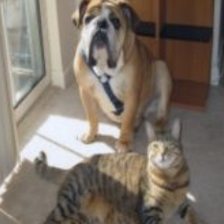

In [6]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Gradient SHAP method help us `interpret` the image with respect to the predicted label. We choose to choose the default baselines which are all zeros. Gradients are visualize in grayscale.

/opt/conda/envs/paddle2/lib/python3.7/site-packages/paddle/nn/layer/norm.py:648: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


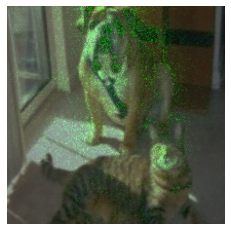

In [7]:
gradients = gs.interpret(
        img_path,
        labels=None,
        noise_amount=0.1,
        n_samples=20,
        visual=True,
        save_path=None)

Another choice for visualization is to overlay the gradients with the original image.

Note that `GradShapCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!